In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('Cleaned Data 1.csv',index_col= 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6890 entries, 0 to 16709
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  6890 non-null   object 
 1   Platform              6890 non-null   object 
 2   Year_of_Release       6890 non-null   float64
 3   Genre                 6890 non-null   object 
 4   Publisher             6889 non-null   object 
 5   NA_Sales              6890 non-null   float64
 6   EU_Sales              6890 non-null   float64
 7   JP_Sales              6890 non-null   float64
 8   Other_Sales           6890 non-null   float64
 9   Global_Sales          6890 non-null   float64
 10  Critic_Score          6890 non-null   float64
 11  Critic_Count          6890 non-null   float64
 12  User_Score            6890 non-null   float64
 13  User_Count            6890 non-null   float64
 14  Developer             6890 non-null   object 
 15  Rating              

## Decision Tree 

In [24]:
User_Score = pd.DataFrame(df['New_User_Score'])  # Response
Global_Sales = pd.DataFrame(df['Global_Sales'])      # Predictor

In [39]:
User_Score["New_User_Score"].value_counts()

1    4528
0    2362
Name: New_User_Score, dtype: int64

In [26]:
Global_Sales.describe()

,Global_Sales
count,6890.000000
mean,0.771851
std,1.955287
min,0.010000
25%,0.110000
50%,0.290000
75%,0.750000
max,82.530000


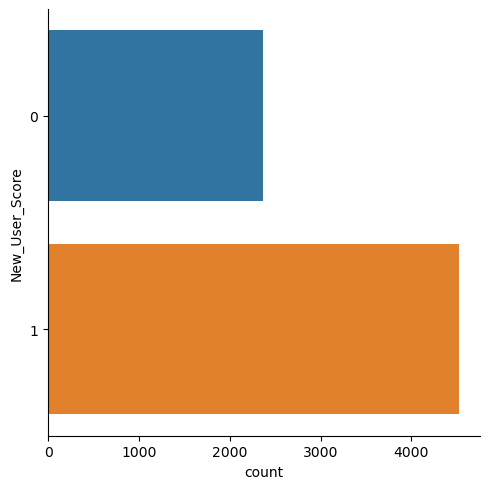

In [27]:
# Count Plot for Legendary Train
sb.catplot(y = "New_User_Score", data = User_Score, kind = "count")
plt.show()

## Decision tree of Global_Sales against User_Score

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.660921625544267

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6422351233671988



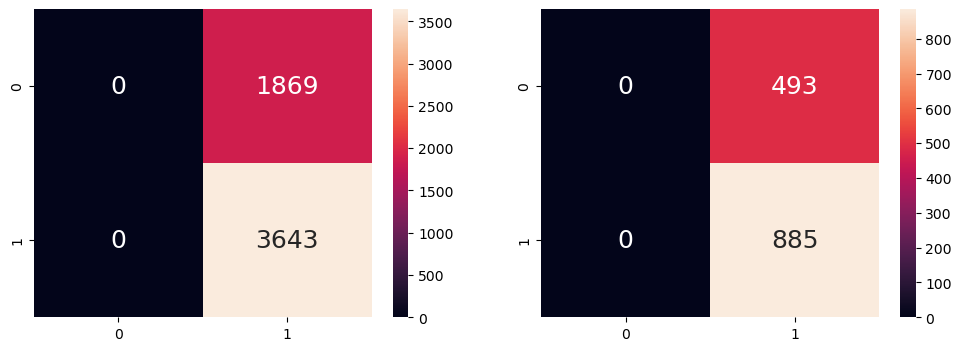

In [28]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(Global_Sales, User_Score, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

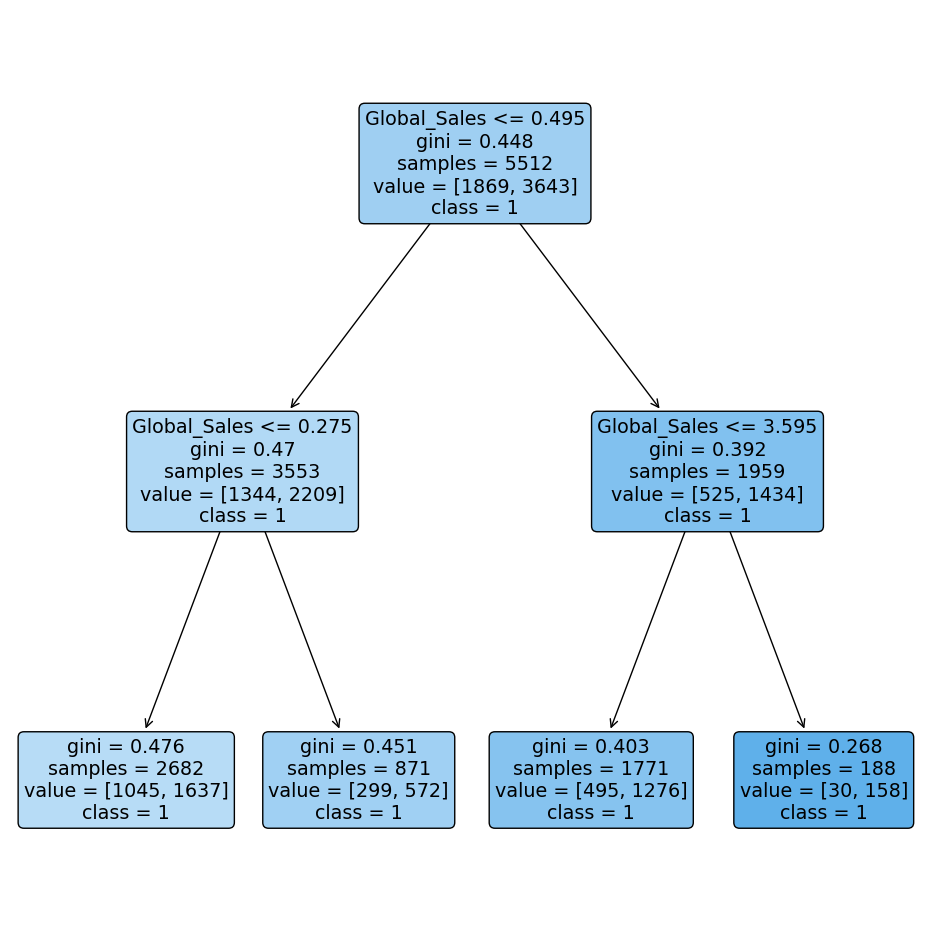

In [29]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Global_Sales"], 
          class_names=["0","1"])
plt.show()

## Decision tree of Developer_Class against User_Score

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6536647314949202

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6712626995645864



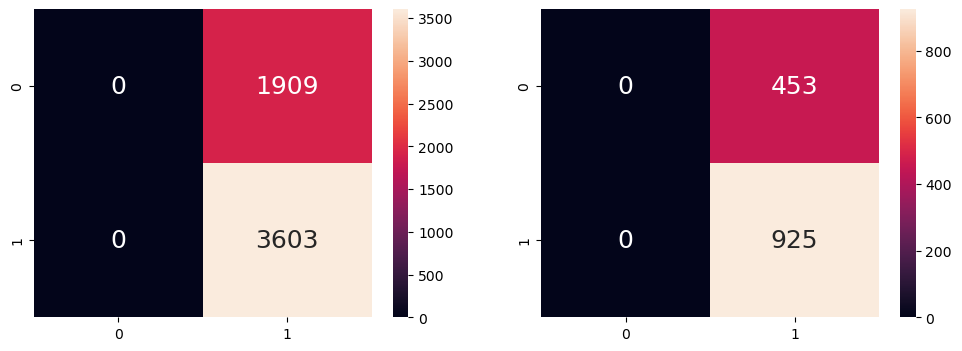

In [30]:
Developer_class = pd.DataFrame(df['Developer_clas'])

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(Global_Sales, User_Score, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

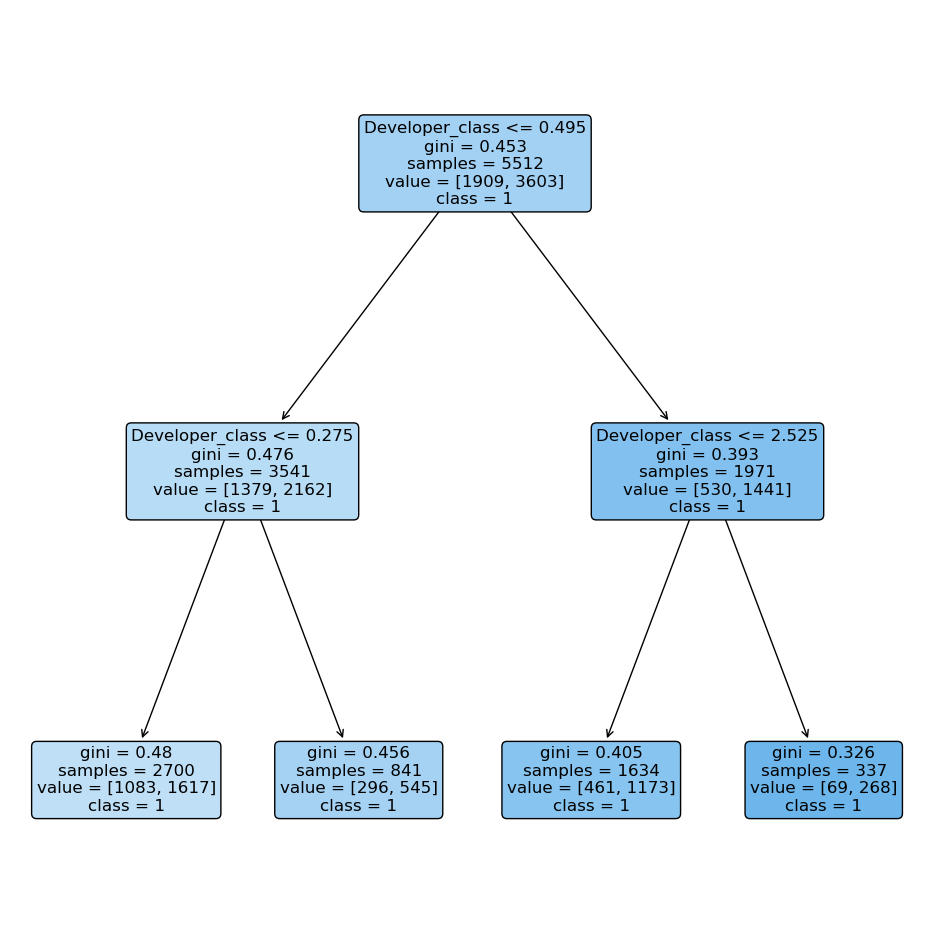

In [31]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Developer_class"], 
          class_names=["0","1"])
plt.show()

## Classification tree of years_since_release against User_score

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6583817126269956

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6523947750362845



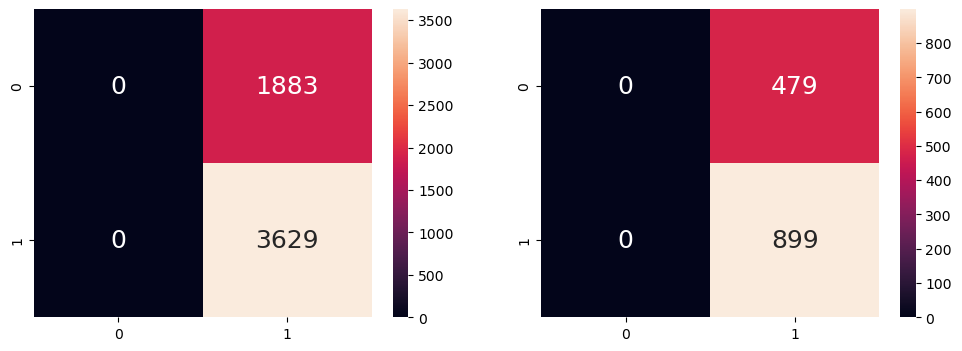

In [32]:
years_since_release = pd.DataFrame(df['years_since_release'])

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(years_since_release, User_Score, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

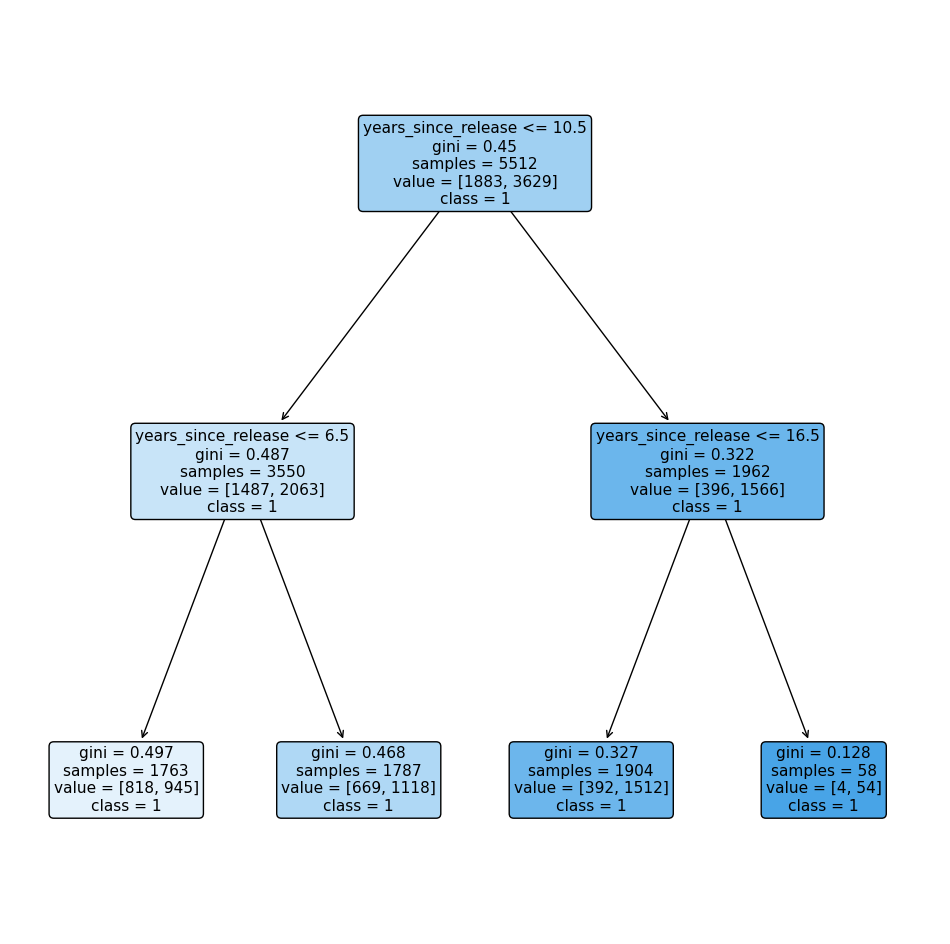

In [33]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["years_since_release"], 
          class_names=["0","1"])
plt.show()

## Classification Tree for Critic_Score against User_score

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7431059506531205

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7249637155297532



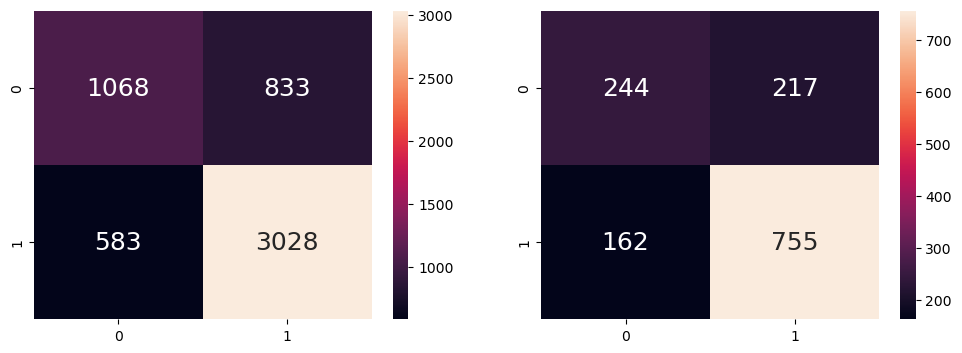

In [34]:
critic_score = pd.DataFrame(df['Critic_Score'])

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(critic_score, User_Score, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

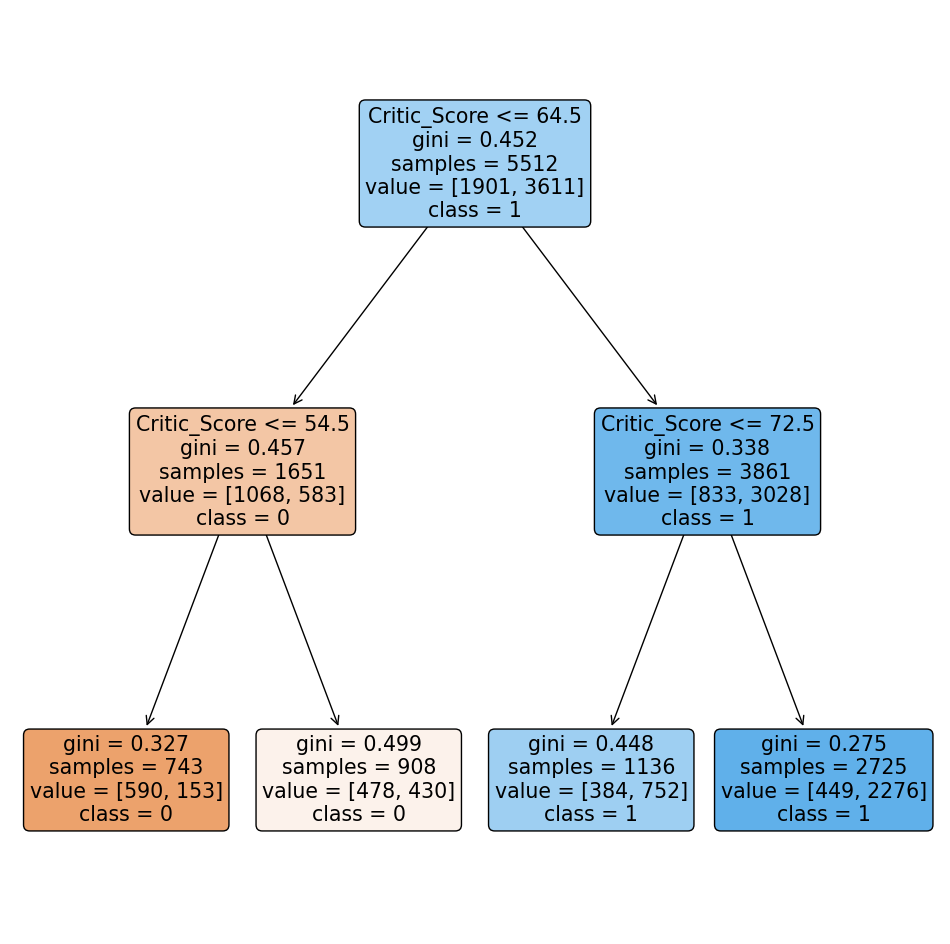

In [35]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Critic_Score"], 
          class_names=["0","1"])
plt.show()

## Multi-Variate Classification tree

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7296806966618288

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7300435413642961



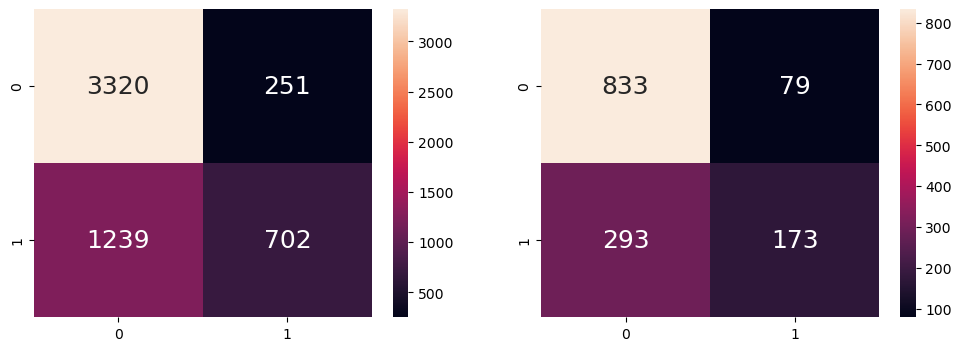

In [41]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
y = pd.DataFrame(df['New_User_Score'])
X = pd.DataFrame(df[["Critic_Score", "years_since_release", "Global_Sales", "Developer_clas"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

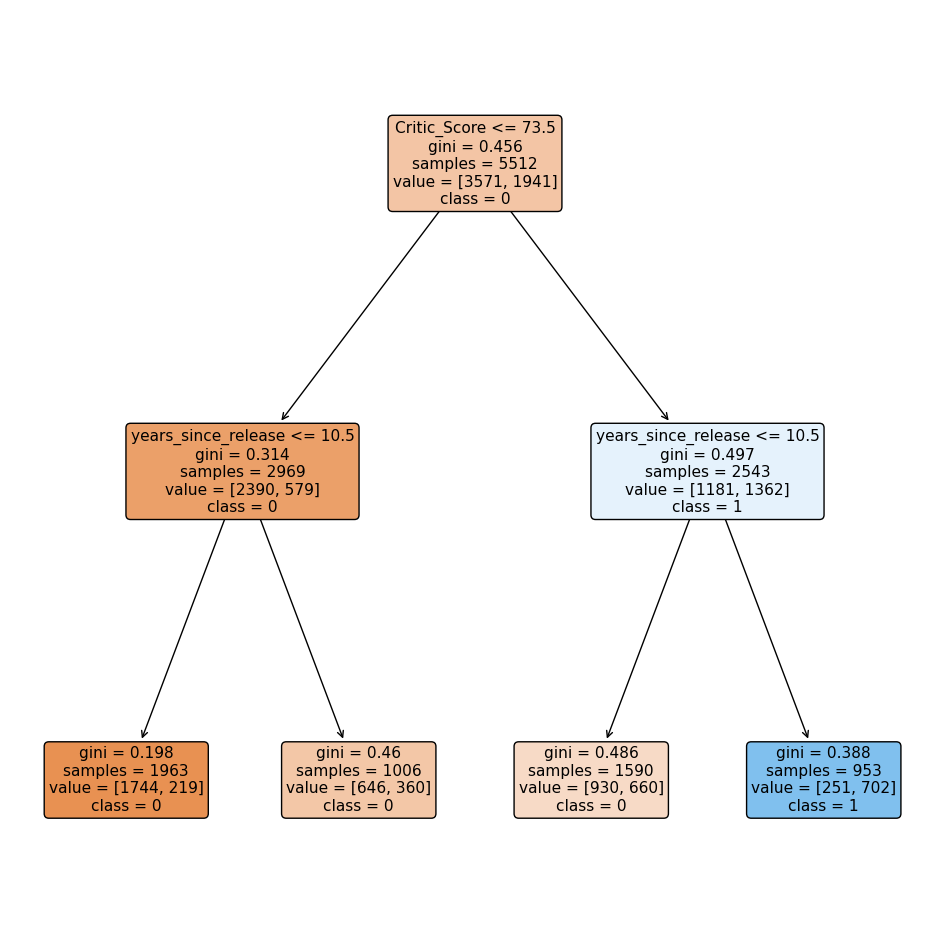

In [42]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["0","1"])
plt.show()

In [18]:
df.to_csv('Cleaned Data 2.csv')